# Decision trees

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("titanic.csv")

In [4]:
df.head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


In [5]:
df_filter = df.drop(["Name", "Fare"], axis=1)

In [6]:
df_filter

,Survived,Pclass,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard
0,0,3,male,22.0,1,0
1,1,1,female,38.0,1,0
2,1,3,female,26.0,0,0
3,1,1,female,35.0,1,0
4,0,3,male,35.0,0,0
...,...,...,...,...,...,...
882,0,2,male,27.0,0,0
883,1,1,female,19.0,0,0
884,0,3,female,7.0,1,2
885,1,1,male,26.0,0,0


In [7]:
df_filter.columns = ["Survived", "Pclass", "Sex", "Age", "SibSp", "Parch"]
df_filter.head()

,Survived,Pclass,Sex,Age,SibSp,Parch
0,0,3,male,22.0,1,0
1,1,1,female,38.0,1,0
2,1,3,female,26.0,0,0
3,1,1,female,35.0,1,0
4,0,3,male,35.0,0,0


In [8]:
df_filter.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
dtype: object

In [9]:
df_filter = pd.get_dummies(df_filter, columns=["Sex"], drop_first=True)
df_filter

,Survived,Pclass,Age,SibSp,Parch,Sex_male
0,0,3,22.0,1,0,1
1,1,1,38.0,1,0,0
2,1,3,26.0,0,0,0
3,1,1,35.0,1,0,0
4,0,3,35.0,0,0,1
...,...,...,...,...,...,...
882,0,2,27.0,0,0,1
883,1,1,19.0,0,0,0
884,0,3,7.0,1,2,0
885,1,1,26.0,0,0,1


In [10]:
df_filter.rename(columns={"Sex_male":"Sex"}, inplace=True)

In [11]:
df_filter.head()

,Survived,Pclass,Age,SibSp,Parch,Sex
0,0,3,22.0,1,0,1
1,1,1,38.0,1,0,0
2,1,3,26.0,0,0,0
3,1,1,35.0,1,0,0
4,0,3,35.0,0,0,1


In [12]:
X = df_filter.drop(["Survived"], axis=1)
y = df_filter["Survived"]

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=00000)

In [15]:
tree = DecisionTreeClassifier(max_depth=2, random_state=00000)

In [16]:
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=0)

In [17]:
y_train_pred = tree.predict(X_train)
y_test_pred = tree.predict(X_test)

In [18]:
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
print("train_accuracy :", train_accuracy)
print("test_accuracy :", test_accuracy)

train_accuracy : 0.8048387096774193
test_accuracy : 0.7640449438202247


c:\Users\rodri\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


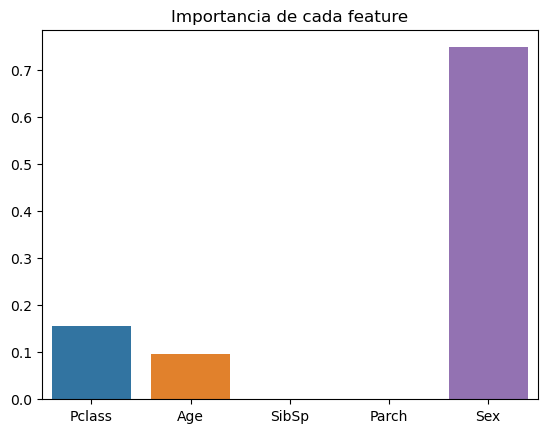

In [19]:
importances = tree. feature_importances_
columns = X.columns
sns.barplot(columns, importances)
plt.title("Importancia de cada feature")
plt.show()

# Proyecto de Decision Tree

In [44]:
df_car = pd.read_csv("car_evaluation.csv", header=None)

In [45]:
df_car.head()

,0,1,2,3,4,5,6
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [46]:
df_car.shape

(1728, 7)

In [47]:
df_car.dtypes

0    object
1    object
2    object
3    object
4    object
5    object
6    object
dtype: object

In [48]:
df_car.columns=['buying','maint','doors', 'persons', 'lug_boot', 'safety', 'class']

In [49]:
df_car.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [50]:
df_car['class'].value_counts()

unacc    1210
acc       384
good       69
vgood      65
Name: class, dtype: int64

In [51]:
df_car.isnull().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64

In [52]:
X = df_car.drop(['class'], axis=1)
y = df_car['class']

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=48)

In [54]:
import category_encoders as ce

In [55]:
encoder = ce.OrdinalEncoder(cols = ['buying','maint','doors', 'persons', 'lug_boot', 'safety'])

In [56]:
X_train = encoder.fit_transform(X_train)
X_test = encoder.fit_transform(X_test)

In [57]:
X_test.head()

,buying,maint,doors,persons,lug_boot,safety
1038,1,1,1,1,1,1
922,1,2,1,2,1,2
1666,2,3,2,3,2,2
865,1,2,3,2,2,2
578,3,1,2,1,2,3


In [58]:
tree = DecisionTreeClassifier(max_depth=2, random_state=48)

In [59]:
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=48)

In [60]:
y_train_pred_tree = tree.predict(X_train)
y_test_pred_tree = tree.predict(X_test)

In [61]:
train_accuracy_tree = accuracy_score(y_train, y_train_pred_tree)
test_accuracy_tree = accuracy_score(y_test, y_test_pred_tree)

print(
    "train_accuracy_tree: ", train_accuracy_tree, "\n", "test_accuracy_tree: ", test_accuracy_tree
)

train_accuracy_tree:  0.7816377171215881 
 test_accuracy_tree:  0.464354527938343


c:\Users\rodri\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

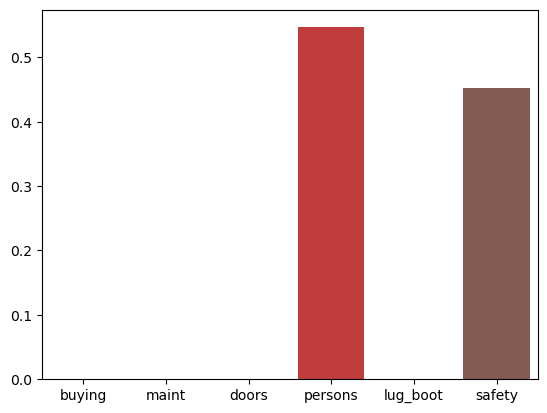

In [62]:
importances = tree.feature_importances_
columns = X.columns
sns.barplot(columns, importances)